In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [30]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [28]:
model = LinearSVC()
model.fit(X_train,y_train)
model.predict(X_test) #Predicting the classification class of the test data

c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [29]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

### Plot Decision boundary of different SVC classification methods

In [69]:
X_train = iris.data[:, :2]
y_train = iris.target

In [77]:
C = 1.0 #Regularization parameter
models = (
    svm.SVC(kernel='linear', C=C),
    LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel='rbf', gamma=0.7, C=C),
    svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
)

In [78]:
models = (clf.fit(X_train,y_train) for clf in models)

In [79]:
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

Parameters for the DecisionBoundaryDisplay:
1) estimator - classification model that is used to estimate and plot the decision boundary
2) X - 2D input data, array or sparse matrix, dataframe
3) response_method - whether to use decision_function, predict_prob, predict as the target response. for multiClass, this will be predict in case of auto is selected.
4) plot_method - plotting method like contourf, contour, pcolormash
5) **kwargs - Additional argument of the plot

c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


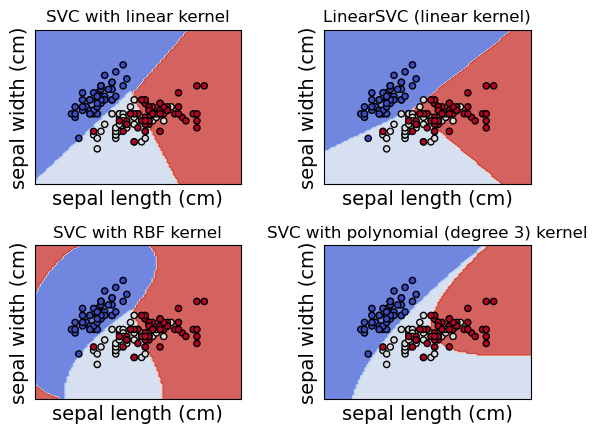

In [80]:
# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4) # used to adjust the width and hight between the plots

X0, X1 = X_train[:, 0], X_train[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_train,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [83]:
#Create a sample 2D data to test decision boundary for classification
X, y = datasets.make_blobs(n_samples=40, centers=2, random_state=0)

In [84]:
clf = LinearSVC(C=1, loss="hinge", random_state=42).fit(X, y)

c:\Users\yoges\anaconda3\envs\Conda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [89]:
decision_function = clf.decision_function(X)

In [113]:
#collect the confidence score from decision function and take the absolute value of this and locate all the 
#points in X whose decision score between +1 and -1
support_vectors = X[np.where(np.abs(decision_function) <= 1+1e-15)]

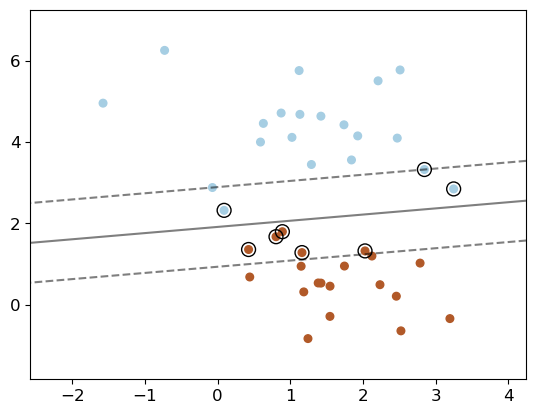

In [110]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
      clf,
      X,
      ax=ax,
      grid_resolution=50,
      plot_method="contour",
      colors="k",
      levels=[-1, 0, 1],
      alpha=0.5,
      linestyles=["--", "-", "--"],
  )
#plot support vector on the same graph
plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors="none", #fill is none in scatter point
    edgecolors="k", #Only edge color of the circle will be visible
)
plt.show()